<a href="https://colab.research.google.com/github/sevenZHQ1018/hangqi-zhang/blob/main/Assignment%201/%20Econ_3961_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
student_basket = [
    {'item': 'Tuition', 'price_2016': 45000, 'price_2024': 58000},
    {'item': 'Rent (1BR)', 'price_2016': 1200, 'price_2024': 1800},
    {'item': 'Chipotle Burrito', 'price_2016': 7.50, 'price_2024': 11.50},
    {'item': 'Spotify Premium', 'price_2016': 9.99, 'price_2024': 11.99},
]

print("Student Basket Created:")
for item in student_basket:
    print(f"  - {item['item']}")

Student Basket Created:
  - Tuition
  - Rent (1BR)
  - Chipotle Burrito
  - Spotify Premium


In [2]:
def calculate_inflation(base, current):
    return ((current - base) / base) * 100


print("Inflation Rates (2016-2024):\n")
for item in student_basket:
    rate = calculate_inflation(item['price_2016'], item['price_2024'])
    print(f"{item['item']:<25s}: {rate:>6.2f}%")
    item['inflation_rate'] = rate

Inflation Rates (2016-2024):

Tuition                  :  28.89%
Rent (1BR)               :  50.00%
Chipotle Burrito         :  53.33%
Spotify Premium          :  20.02%


In [3]:
!pip install fredapi -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [4]:
API_KEY = '546af0d1e5bc4088f46788dd67939bcb '
fred = Fred(api_key=API_KEY)

print("FRED API connected")
print("\nIf you don't have an API key yet:")
print("1. Visit https://fred.stlouisfed.org/")
print("2. Create free account")
print("3. Get API key")
print("4. Replace '546af0d1e5bc4088f46788dd67939bcb ' above")

FRED API connected

If you don't have an API key yet:
1. Visit https://fred.stlouisfed.org/
2. Create free account
3. Get API key
4. Replace '546af0d1e5bc4088f46788dd67939bcb ' above


In [5]:
print("Fetching data from FRED...\n")

official_cpi = fred.get_series('CPIAUCSL')
print("✓ Official CPI")

tuition = fred.get_series('CUSR0000SEEB')
print("✓ Tuition")

rent = fred.get_series('CUSR0000SEHA')
print("✓ Rent")

streaming = fred.get_series('CUSR0000SERA02')
print("✓ Streaming")

food_away = fred.get_series('CUSR0000SEFV')
print("✓ Food Away")

print("\nAll data fetched successfully")

Fetching data from FRED...

✓ Official CPI
✓ Tuition
✓ Rent
✓ Streaming
✓ Food Away

All data fetched successfully


In [6]:
df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Food_Away': food_away
})

df = df.loc['2016-01-01':].copy()

print(f"Data range: {df.index.min()} to {df.index.max()}")
print(f"Number of observations: {len(df)}")

Data range: 2016-01-01 00:00:00 to 2025-12-01 00:00:00
Number of observations: 120


In [7]:
print("\nNormalizing data (2016-01-01 = 100)...\n")

base_date = '2016-01-01'

for col in ['Official_CPI', 'Tuition', 'Rent', 'Streaming', 'Food_Away']:
    base_value = df.loc[base_date, col]
    df[f'{col}_indexed'] = (df[col] / base_value) * 100
    print(f"✓ {col}: base = {base_value:.2f}")

print("\nNormalization complete")


Normalizing data (2016-01-01 = 100)...

✓ Official_CPI: base = 237.65
✓ Tuition: base = 700.00
✓ Rent: base = 291.70
✓ Streaming: base = 427.54
✓ Food_Away: base = 259.96

Normalization complete


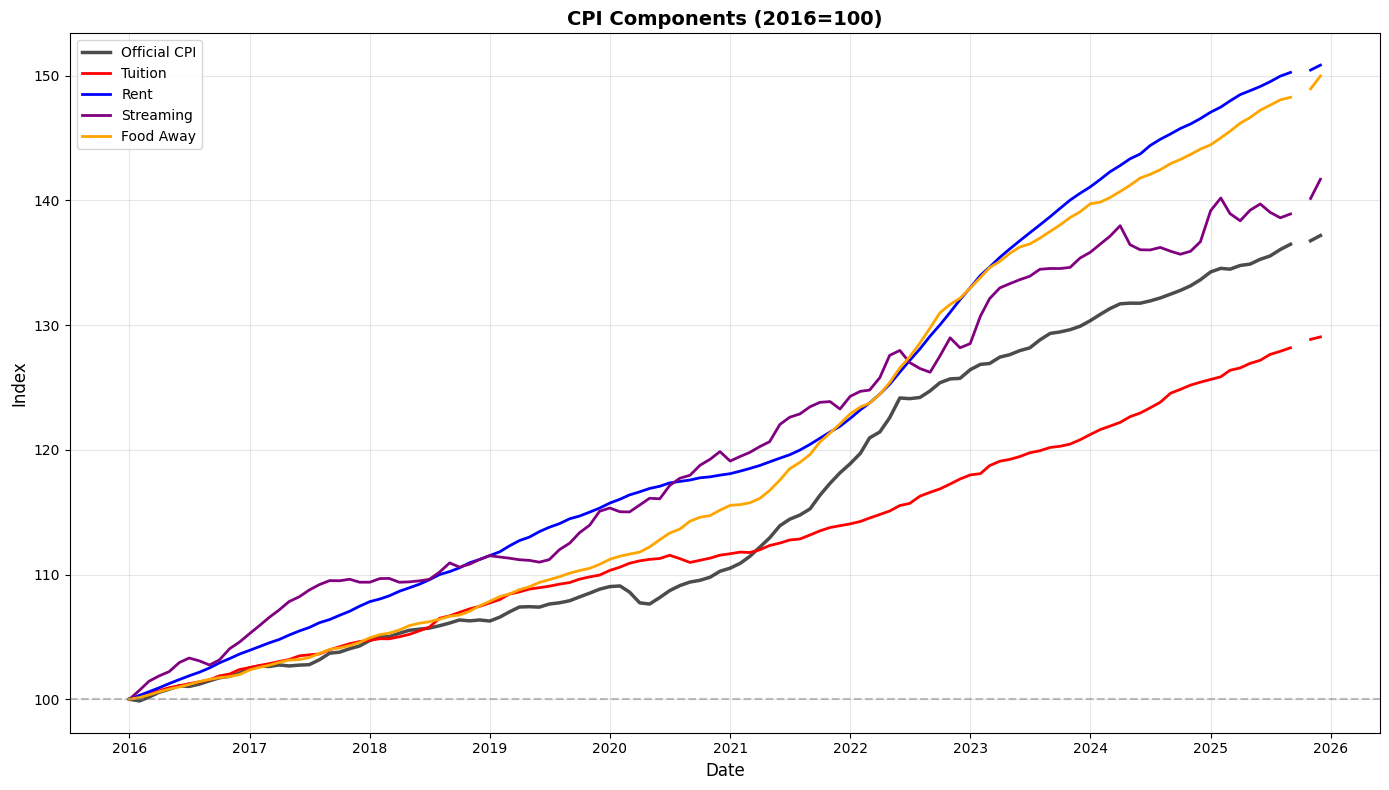

✓ Chart saved


In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df.index, df['Official_CPI_indexed'], label='Official CPI',
       linewidth=2.5, color='black', alpha=0.7)
ax.plot(df.index, df['Tuition_indexed'], label='Tuition',
       linewidth=2, color='red')
ax.plot(df.index, df['Rent_indexed'], label='Rent',
       linewidth=2, color='blue')
ax.plot(df.index, df['Streaming_indexed'], label='Streaming',
       linewidth=2, color='purple')
ax.plot(df.index, df['Food_Away_indexed'], label='Food Away',
       linewidth=2, color='orange')

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax.set_title('CPI Components (2016=100)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cpi_components.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

In [9]:
weights = {
    'Tuition': 0.40,
    'Rent': 0.30,
    'Food_Away': 0.15,
    'Streaming': 0.10,
}

df['Student_SPI'] = (
    weights['Tuition'] * df['Tuition_indexed'] +
    weights['Rent'] * df['Rent_indexed'] +
    weights['Food_Away'] * df['Food_Away_indexed'] +
    weights['Streaming'] * df['Streaming_indexed']
)

print("Student SPI calculated")
print(f"\nLatest values:")
print(f"  Official CPI: {df['Official_CPI_indexed'].iloc[-1]:.2f}")
print(f"  Student SPI:  {df['Student_SPI'].iloc[-1]:.2f}")
print(f"  Gap:          {df['Student_SPI'].iloc[-1] - df['Official_CPI_indexed'].iloc[-1]:.2f}")

Student SPI calculated

Latest values:
  Official CPI: 137.19
  Student SPI:  133.55
  Gap:          -3.64


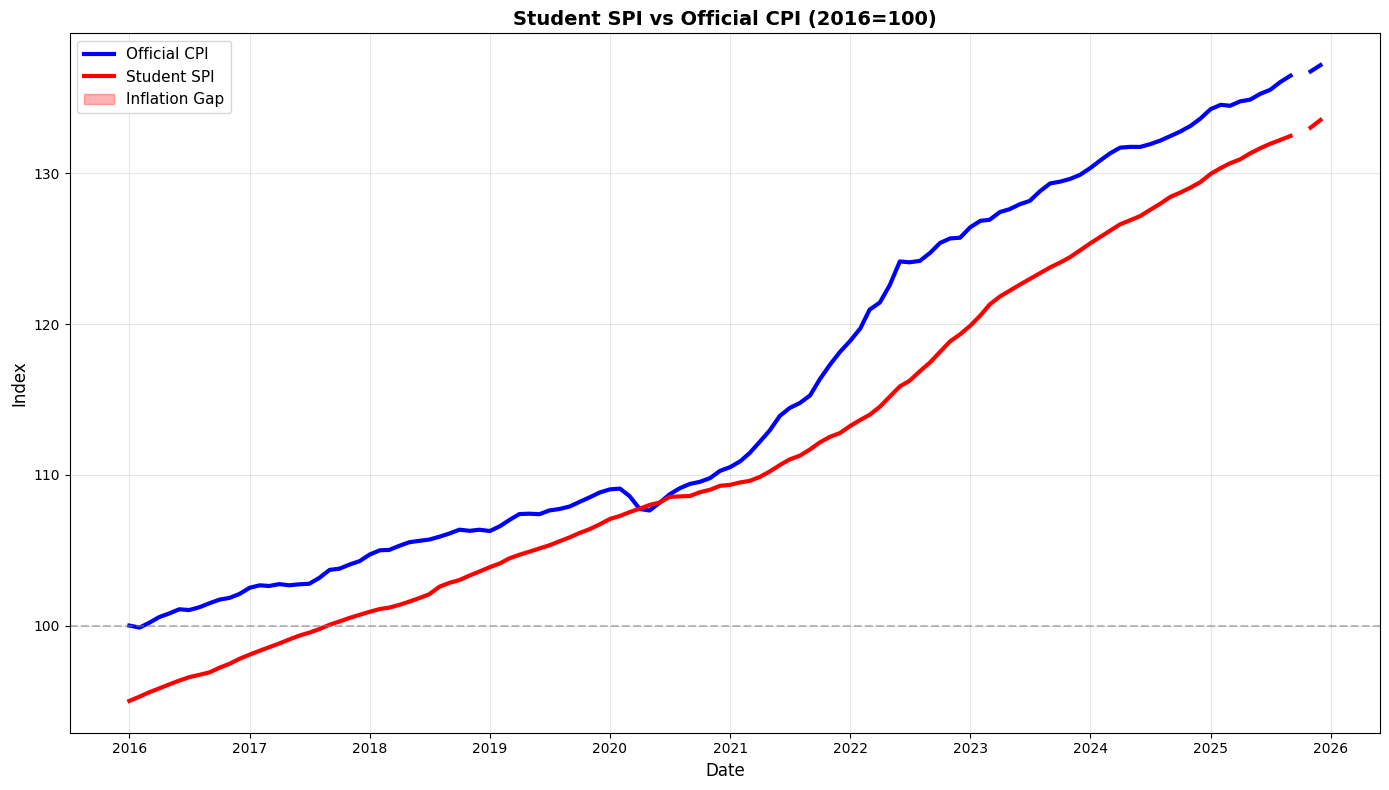

✓ Chart saved


In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df.index, df['Official_CPI_indexed'],
       label='Official CPI', linewidth=3, color='blue')
ax.plot(df.index, df['Student_SPI'],
       label='Student SPI', linewidth=3, color='red')

ax.fill_between(df.index,
               df['Official_CPI_indexed'],
               df['Student_SPI'],
               where=(df['Student_SPI'] > df['Official_CPI_indexed']),
               alpha=0.3, color='red', label='Inflation Gap')

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax.set_title('Student SPI vs Official CPI (2016=100)',
            fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('student_spi_vs_cpi.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

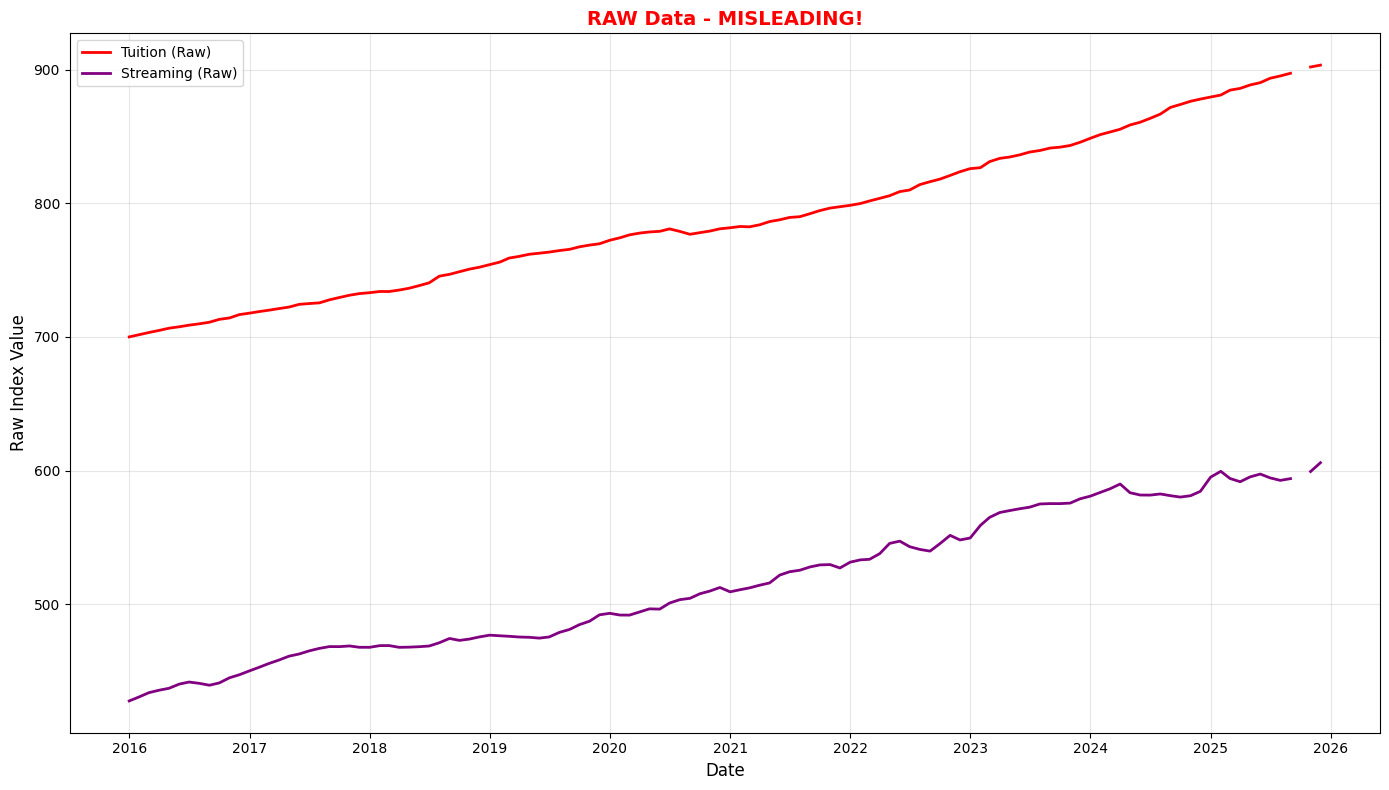

✓ Chart saved


In [11]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df.index, df['Tuition'], label='Tuition (Raw)', linewidth=2, color='red')
ax.plot(df.index, df['Streaming'], label='Streaming (Raw)', linewidth=2, color='purple')

ax.set_title('RAW Data - MISLEADING!', fontsize=14, fontweight='bold', color='red')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Raw Index Value', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('raw_misleading.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

In [12]:
print("Fetching Boston CPI...\n")

try:
    boston_cpi = fred.get_series('CUURA103SA0')
    df['Boston_CPI'] = boston_cpi


    if base_date in df.index:
        base_boston = df.loc[base_date, 'Boston_CPI']
        df['Boston_CPI_indexed'] = (df['Boston_CPI'] / base_boston) * 100
        print("✓ Boston CPI fetched and normalized")

except Exception as e:
    print(f"Note: {e}")
    print("Continuing without Boston data")

Fetching Boston CPI...

✓ Boston CPI fetched and normalized


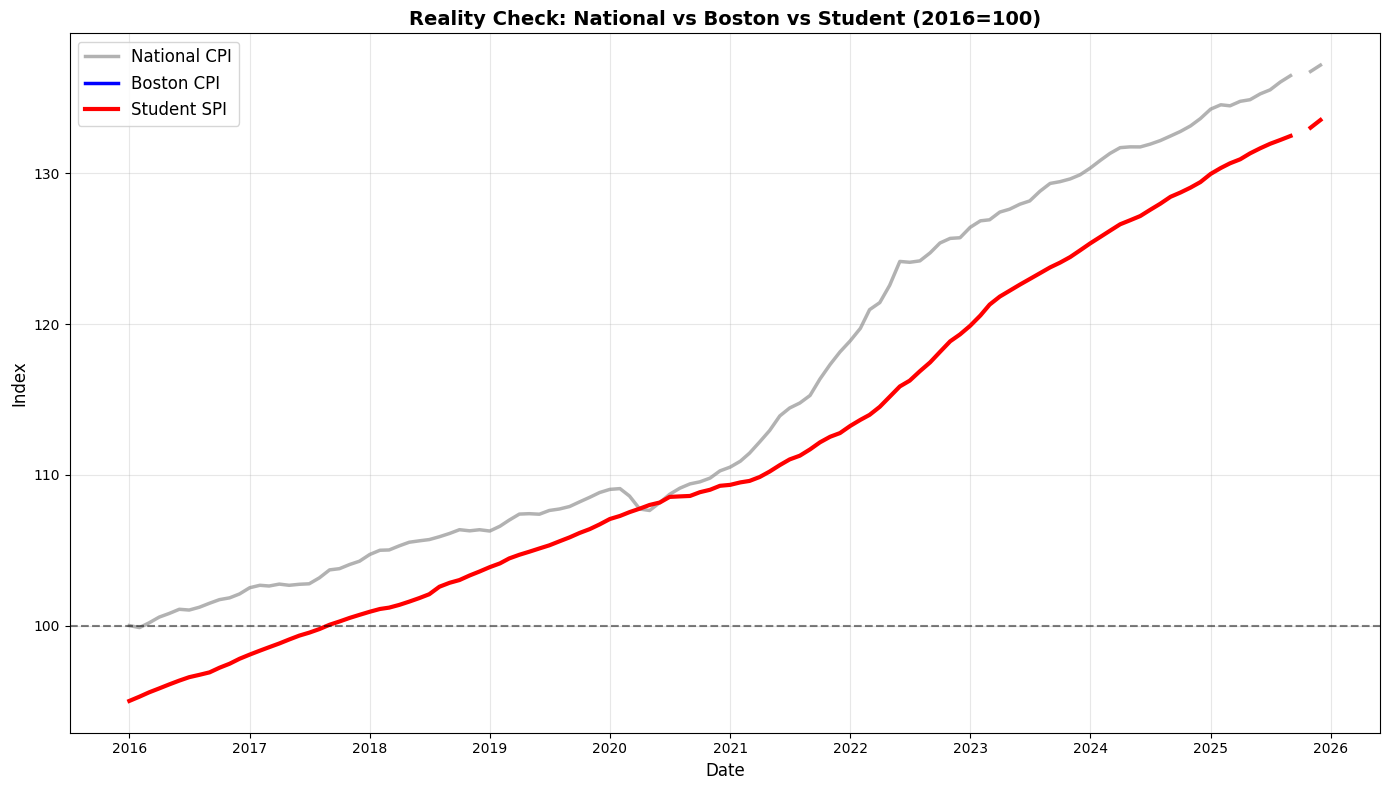

✓ Chart saved


In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df.index, df['Official_CPI_indexed'],
       label='National CPI', linewidth=2.5, color='gray', alpha=0.6)

if 'Boston_CPI_indexed' in df.columns:
    ax.plot(df.index, df['Boston_CPI_indexed'],
           label='Boston CPI', linewidth=2.5, color='blue')

ax.plot(df.index, df['Student_SPI'],
       label='Student SPI', linewidth=3, color='red')

ax.axhline(y=100, color='black', linestyle='--', alpha=0.5)
ax.set_title('Reality Check: National vs Boston vs Student (2016=100)',
            fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('three_way_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved")

In [14]:
print("Key Findings:\n")
print("="*60)

official_growth = df['Official_CPI_indexed'].iloc[-1] - 100
student_growth = df['Student_SPI'].iloc[-1] - 100
gap = student_growth - official_growth

print(f"Period: {df.index[0].strftime('%Y-%m')} to {df.index[-1].strftime('%Y-%m')}")
print(f"\nOfficial CPI growth: {official_growth:.2f}%")
print(f"Student SPI growth:  {student_growth:.2f}%")
print(f"\nInflation Gap: {gap:.2f} percentage points")
print(f"Students pay {gap/official_growth*100:.1f}% more than official inflation")

print("\nComponent contributions:")
for comp in ['Tuition', 'Rent', 'Food_Away', 'Streaming']:
    growth = df[f'{comp}_indexed'].iloc[-1] - 100
    print(f"  {comp:<12s}: {growth:>6.2f}%")

print("="*60)
print("\nUse these findings to generate README.md with AI")

Key Findings:

Period: 2016-01 to 2025-12

Official CPI growth: 37.19%
Student SPI growth:  33.55%

Inflation Gap: -3.64 percentage points
Students pay -9.8% more than official inflation

Component contributions:
  Tuition     :  29.06%
  Rent        :  50.85%
  Food_Away   :  49.98%
  Streaming   :  41.70%

Use these findings to generate README.md with AI
